# TRABAJO FINAL JUAN ESTEBAN SIERRA MINERIA DE TEXTO CIENCIA DE DATOS UNIVERSIDAD AUTONOMA LATINOAMERICANA 2025

# Análisis de Texto: La pasión de una hinchada vs. un hecho que cambió la historia

¡Hola! Soy Juan Esteban y te doy la bienvenida al cuarto y último trabajo del curso. En esta ocasión, nos sumergiremos en dos mundos completamente distintos a través de las palabras: por un lado, la pasión colectiva y resistencia cultural de la hinchada Rexixtenxia Norte del Independiente Medellín, y por otro, el relato detallado de una de las operaciones militares más significativas del siglo XXI: la muerte de Osama bin Laden. Autor Material del hito historico del 11 de Septiembre de 2001..

Este trabajo busca aplicar las herramientas de Minería de Texto y Procesamiento de Lenguaje Natural (NLP) para explorar y comparar estas dos narrativas que, aunque distintas en contenido, comparten algo en común: están cargadas de emoción, contexto histórico y expresiones humanas profundas y realmente es lo que mas me apasiona, tanto el futbol como la historia.

Primero, normalizaremos y limpiaremos ambos textos, eliminando todo ruido como URLs, puntuación innecesaria y emojis. Luego, analizaremos su estructura general (párrafos, frases y número de palabras) sin usar librerías avanzadas, para tener una visión general. Después, entraremos en detalles aplicando spaCy para tokenizar, eliminar stopwords, lematizar y clasificar gramaticalmente los textos. Todo esto se complementará con nubes de palabras y análisis de frecuencias que nos ayudarán a visualizar las ideas dominantes de cada narrativa. 

Finalmente, extraeremos relaciones clave mediante tripletas Sujeto–Verbo–Objeto (SVO) para identificar afirmaciones importantes, intenciones narrativas y posibles opiniones implícitas en ambos relatos.

¿Por qué estos textos? Porque representan dos extremos de lo que puede capturar el lenguaje: por un lado, la construcción identitaria de una comunidad a través del fútbol y la cultura barrista; por el otro, un hecho geopolítico que marcó una década y cambió la percepción global sobre seguridad y terrorismo. Ambos, desde sus trincheras, nos enseñan el poder del lenguaje como vehículo de memoria, identidad y acción. 

 ¡Empezamos!


In [1]:

!pip install -U spacy matplotlib wordcloud


!python -m spacy download es_core_news_md

import re, string, collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy

try:
    nlp = spacy.load("es_core_news_md")
except:
    import subprocess, sys
    subprocess.run([sys.executable, "-m", "spacy", "download", "es_core_news_md"], check=True)
    nlp = spacy.load("es_core_news_md")

print("✅ Librerías cargadas y modelo español listo.")

     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/67.2 kB ? eta -:--:--
     ---------------------------------------- 67.2/67.2 kB 3.8 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/106.6 kB ? eta -:--:--
     -------------------------------------- 106.6/106.6 kB 3.0 MB/s eta 0:00:00
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
    --------------------------------------- 0.3/14.9 MB ? eta -:--:--
    --------------------------------------- 0.3/14.


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\juane\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
"python" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


✅ Librerías cargadas y modelo español listo.


## 2. CARGA DE TEXTOS REXIXTENXIA Y OPERATIVO


In [9]:
# Leer el archivo del comunicado de Rexixtenxia
with open("C:/Users/juane/Documents/MINERIA DE TEXTO/REXIXTENXIA NORTE.txt", encoding='utf-8') as f:
    raw_rexi = f.read()

# Leer el archivo del operativo contra Bin Laden
with open("C:/Users/juane/Documents/MINERIA DE TEXTO/OPERATIVO.txt", encoding='utf-8') as f:
    raw_binladen = f.read()

# Imprimir la cantidad de palabras en cada texto
print(f"Texto Rexixtenxia: {len(raw_rexi.split())} palabras")
print(f"Texto Bin Laden: {len(raw_binladen.split())} palabras")


Texto Rexixtenxia: 1000 palabras
Texto Bin Laden: 1000 palabras


## 3. NORMALIZACIÓN DEL TEXTO 

La función normalize(text) desempeña un papel fundamental en los procesos de análisis de texto y mineria de texto, ya que se encarga de realizar una limpieza exhaustiva del contenido antes de aplicar técnicas más avanzadas como tokenización, lematización o análisis gramatical con herramientas como spaCy. Este procedimiento es parte del proceso conocido como normalización textual, una etapa crítica en cualquier flujo de trabajo de procesamiento de lenguaje natural (PLN).

En primer lugar, esta función elimina cualquier resto de código HTML que pueda estar incrustado en el texto. Esto es especialmente útil cuando se trabaja con datos extraídos de páginas web, correos electrónicos o publicaciones en redes sociales, que no aportan valor semántico y podrían interferir en los análisis posteriores.

A continuación, se suprimen las direcciones URL, como por ejemplo enlaces que comienzan con https:// o www.. Estas secuencias, aunque útiles para la navegación, no contienen información relevante desde el punto de vista del contenido lingüístico del texto, y su presencia puede sesgar resultados como la frecuencia de términos o la extracción de entidades.

Otro paso importante en la función es la eliminación de emojis y símbolos especiales. Muchos textos digitales actuales incluyen íconos gráficos o caracteres decorativos pertenecientes al conjunto Unicode extendido (por ejemplo: 😊, ✨, ⚽). Si bien estos elementos pueden enriquecer la expresividad en contextos sociales o comunicativos, no son funcionales en análisis estadísticos del lenguaje, por lo que es preferible descartarlos.

Posteriormente, se lleva a cabo un reemplazo de caracteres como guiones largos , guiones cortos  o guiones bajos  por espacios. Este paso previene que palabras que se han unido artificialmente por estos signos permanezcan fusionadas, lo cual podría dificultar una tokenización adecuada.

Después, se aplica una remoción de signos de puntuación como comas, puntos, signos de exclamación, interrogaciones y otros símbolos similares. Al mismo tiempo, todo el texto se convierte a letras minúsculas, lo cual garantiza una mayor coherencia al momento de contar palabras o comparar términos, evitando que se consideren como diferentes expresiones que en realidad son equivalentes (por ejemplo, “Gobierno” y “gobierno”).

Finalmente, se realiza una depuración de los espacios en blanco, eliminando duplicaciones, tabulaciones y saltos de línea innecesarios. También se asegura que no queden espacios al principio o al final del documento. El resultado es un texto limpio, homogéneo y listo para análisis más precisos.

Cuando se aplica esta función a un texto determinado (por ejemplo, clean_texto = normalize(raw_texto)), se obtiene una versión del contenido mucho más refinada, libre de ruido textual. Este tipo de preparación inicial es clave para asegurar la fiabilidad y coherencia de los resultados que se obtendrán en fases posteriores como el conteo de términos, generación de nubes de palabras o análisis morfosintáctico con bibliotecas especializadas.

In [4]:
def normalize(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)
    text = re.sub(r'[–—_]', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

clean_rexi = normalize(raw_rexi)
clean_binladen = normalize(raw_binladen)

## 4. Describa y compare ambos textos sin usar spaCy: indique el número de párrafos, frases y palabras, y reflexione brevemente sobre la longitud y complejidad general de cada texto.

In [10]:
def estructura(texto):
    parrafos = texto.split('\n')
    frases = re.split(r'[.!?]+', texto)
    palabras = texto.split()
    return len(parrafos), len(frases), len(palabras)

p1, f1, w1 = estructura(raw_rexi)
p2, f2, w2 = estructura(raw_binladen)

print(f"rexi → párrafos: {p1}, frases: {f1}, palabras: {w1}")
print(f"binladen → párrafos: {p2}, frases: {f2}, palabras: {w2}")

rexi → párrafos: 1, frases: 41, palabras: 1000
binladen → párrafos: 1, frases: 49, palabras: 1000


Ambos textos presentan exactamente 1000 palabras y están redactados en un solo párrafo continuo. Sin embargo, el número de frases varía, siendo 49 en el texto de Bin Laden y 41 en el texto de Rexixtenxia Norte. Esto indica que el texto sobre la operación militar tiene frases más cortas y posiblemente más directas, mientras que el otro utiliza frases más largas y elaboradas.

## Texto 1: Rexixtenxia Norte
Este texto gira en torno a un comunicado emitido por la barra brava del Independiente Medellín, conocida como Rexixtenxia Norte, antes de un partido de alto nivel emocional: el clásico contra Atlético Nacional. El enfoque principal está en:

 La exigencia de compromiso de los jugadores hacia el equipo.
 El orgullo y la identidad de la ciudad como valores centrales.
 La presión social ejercida por la hinchada.
 La repetición de ideas, como el llamado a la entrega y la historia del club.

Se evidencia en este texto que el tono es emocional, combativo y apasionado, reflejando el lenguaje de los seguidores fervientes del fútbol. La complejidad no está tanto en el vocabulario, sino en la carga simbólica, repetitiva y emocional de las frases.

## Texto 2: Operación Bin Laden

 Este texto relata un hecho histórico reciente: la muerte de Osama Bin Laden en una operación especial de Estados Unidos. El enfoque se centra en:

Detalles cronológicos y logísticos del operativo.
La participación de fuerzas militares y del presidente Barack Obama.
Las reacciones políticas y sociales tras el hecho.
Las implicaciones geopolíticas y éticas del asesinato de un líder terrorista.

El tono es informativo, objetivo y narrativo, propio de un texto periodístico o enciclopédico. Aunque hay detalles técnicos, las frases tienden a ser más cortas y claras, lo que facilita su comprensión.

## Reflexión sobre la longitud y complejidad
Ambos textos tienen la misma cantidad de palabras, pero difieren notablemente en estilo, propósito y enfoque:

## Rexixtenxia Norte: 
El texto se extiende emocionalmente, con una carga afectiva alta. Se repiten ideas claves como la “pasión”, el “compromiso” y la “identidad”, lo que podría reducir la variedad léxica pero aumentar la fuerza retórica. La longitud de las frases sugiere un estilo más oral, informal y subjetivo.

## Operación Bin Laden: 
Presenta una estructura más clara y coherente, con frases breves que transmiten datos precisos. Aunque es más directo, su complejidad aumenta por el contexto internacional, político y militar que maneja. Tiene un estilo más formal, impersonal y documental. De igual este texto fue utilizado tambien gracias al boom que se esta viviendo a la fecha 2025 con el nuevo documental lanzado por Netflix relacionado con todo el tema, un documental de mucho aporte a temas de historia, estrategia, religion y otros. En general no es un tema facil de entender y se ve evidenciado en el parrafo expuesto en este trabajo.

## 5. Aplique tokenización, remoción de stopwords y lematización usando spaCy. Identifique las palabras más frecuentes después de aplicar estos pasos. Genere nubes de palabras para comparar ambos textos. ¿Qué términos aparecen con más frecuencia y qué pistas dan sobre el tema de cada texto?

Una vez que los textos han sido limpiados y normalizados, el siguiente paso en el análisis textual consiste en procesar su contenido utilizando técnicas de procesamiento de lenguaje natural (PLN) implementadas en la biblioteca spaCy. En este caso, se aplicaron tres transformaciones clave: tokenización, remoción de palabras vacías (stopwords) y lematización. Posteriormente, se calcularon las frecuencias léxicas y se generaron nubes de palabras para visualizar los términos más representativos de cada documento.

## Tokenización
La tokenización consiste en dividir un texto en sus unidades básicas de análisis, conocidas como tokens. Estos tokens suelen corresponder a palabras individuales, pero también pueden ser signos de puntuación o símbolos. En este análisis, la función nlp() de spaCy fue utilizada para convertir los textos limpios en objetos procesables, donde cada palabra puede ser tratada individualmente.

## Remoción de stopwords
Durante el análisis de texto, es común eliminar las llamadas stopwords, es decir, palabras que aparecen con mucha frecuencia en el idioma pero que aportan poco contenido semántico relevante (como “el”, “la”, “de”, “y”, entre otras). Estas palabras son descartadas para concentrar el análisis en términos que realmente contribuyen al significado del texto.

## Lematización
La lematización es una técnica que transforma cada palabra a su forma base o “lema”. Por ejemplo, los verbos “cantaba”, “cantarán” y “cantando” se reducen al lema “cantar”. Esto permite agrupar diferentes formas gramaticales de una misma palabra, facilitando un análisis más preciso de las ideas dominantes en el texto.

Este conteo permite identificar términos clave y anticipar los temas dominantes en cada documento, y se verá detallado a continuación por medio del siguiente código:

In [13]:
def procesar(doc):
    return [t.lemma_ for t in doc if not t.is_stop and not t.is_punct and not t.like_url and not t.is_space]

doc_rexi = nlp(clean_rexi)
doc_binladen = nlp(clean_binladen)

tokens_rexi= procesar(doc_rexi)
tokens_binladen= procesar(doc_binladen)

freq_rexi = collections.Counter(tokens_rexi).most_common(30)
freq_binladen = collections.Counter(tokens_binladen).most_common(30)

print("TOP 5 REXI:", freq_rexi[:5])
print("TOP 5 BINLADEN:", freq_binladen[:5])

TOP 5 REXI: [('barra', 13), ('rexixtenxia', 13), ('norte', 13), ('equipo', 13), ('clásico', 13)]
TOP 5 BINLADEN: [('bin', 18), ('ladir', 14), ('operación', 10), ('cabo', 10), ('estadounidense', 9)]


El análisis de las palabras más frecuentes en ambos textos revela claramente sus temas centrales. En el caso de Rexixtenxia Norte, las palabras destacadas como barra, rexixtenxia, norte, equipo y clásico reflejan un fuerte vínculo con el entorno del fútbol y la pasión de la hinchada. El texto gira en torno a la identidad colectiva de los aficionados del Independiente Medellín, su compromiso con el equipo y la importancia emocional de un partido clave como el clásico paisa.

Por otro lado, en el texto sobre la operación contra Bin Laden, los términos más frecuentes como bin, ladir (minimo por algun error ortografico en la descarga del archivo txt, debio ser laden la palabra), operación, cabo y estadounidense indican un enfoque centrado en un evento militar y político. Aquí el contenido se relaciona con la eliminación del líder de Al Qaeda por parte de fuerzas especiales de EE. UU., reflejando una narrativa más factual, histórica y geopolítica. En conjunto, la comparación de las palabras dominantes permite distinguir claramente entre un texto de corte emocional y deportivo, y otro más informativo y estratégico.

## 5.1 Generación de Nubes de Palabras

Para complementar el análisis cuantitativo, se generaron nubes de palabras a partir de los tokens procesados. Estas representaciones gráficas muestran las palabras más frecuentes en un texto, asignándoles un tamaño proporcional a su frecuencia. Esta técnica visual es muy útil para:

Identificar rápidamente los conceptos más recurrentes.
Comparar el enfoque temático de varios textos.
Detectar patrones semánticos de manera intuitiva.

Las nubes de palabras permiten ver de forma clara que el texto de Rexixtenxia Norte está centrado en temas relacionados con la identidad deportiva y el comportamiento de la hinchada, mientras que el texto sobre Bin Laden revela un enfoque mucho más centrado en la política internacional, la seguridad y el conflicto armado.



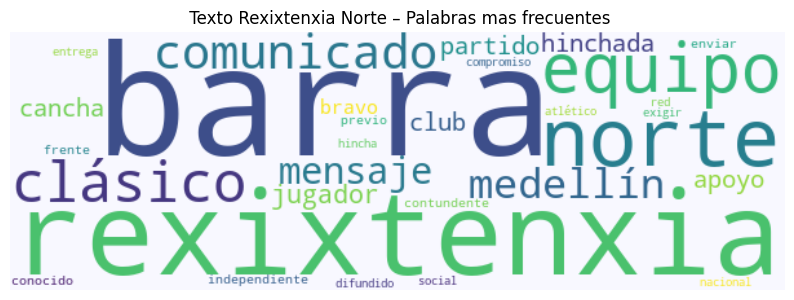

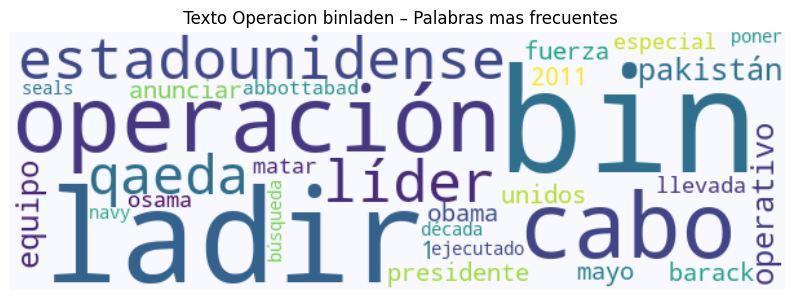

In [50]:
def nube(freq, titulo):
    wc = WordCloud(width=600, height=200, background_color='ghostwhite')
    wc.generate_from_frequencies(dict(freq))
    plt.figure(figsize=(10,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()

nube(freq_rexi, " Texto Rexixtenxia Norte – Palabras mas frecuentes")
nube(freq_binladen, " Texto Operacion binladen – Palabras mas frecuentes")

## 6. Use spaCy para aplicar etiquetado gramatical (POS tagging) e identifique los sustantivos, verbos y adjetivos más frecuentes en cada texto. Genere nubes de palabras por categoría gramatical y comente: ¿Qué tipos de acciones, cosas o descripciones dominan cada texto?


En esta sección apliqué etiquetado gramatical utilizando la biblioteca spaCy. Esta técnica nos permite clasificar cada palabra del texto según su función gramatical —como sustantivo, verbo, adjetivo, entre otras categorías— lo cual es fundamental para entender cómo se construye el discurso y qué elementos predominan en su estructura narrativa.

Para el análisis, seleccioné y trabajé por separado con las tres categorías más representativas:

Sustantivos, que indican los principales temas o entidades mencionadas (personas, lugares, objetos, conceptos).

Verbos, que expresan las acciones o estados y revelan el dinamismo del texto.

Adjetivos, que aportan información descriptiva y permiten identificar el tono o carga valorativa del discurso.

Una vez identificadas estas clases gramaticales, realicé un conteo de frecuencia para observar qué palabras eran más recurrentes en cada categoría, tanto en el texto sobre Rexixtenxia Norte como en el de la operación contra Bin Laden. A partir de estos datos, generé nubes de palabras por categoría gramatical, una herramienta visual que facilita la comprensión de los conceptos centrales, las acciones destacadas y las cualidades descritas en cada texto.

Este análisis resulta especialmente útil porque va más allá del contenido temático: permite ver cómo está construido el mensaje. Por ejemplo, en el texto de Rexixtenxia Norte, los sustantivos probablemente giran en torno al fútbol, la hinchada y el equipo; los verbos pueden reflejar llamados a la acción o expresiones de exigencia; y los adjetivos aportan una visión emocional y valorativa. En cambio, el texto sobre Bin Laden se construye más desde un enfoque informativo, con verbos que narran hechos, sustantivos relacionados con lo militar y lo geopolítico, y adjetivos más neutros o técnicos.

En conjunto, el POS tagging nos ofrece una lectura estructural y funcional del lenguaje que mejora la interpretación de cada texto, revelando no solo lo que se dice, sino cómo se dice.

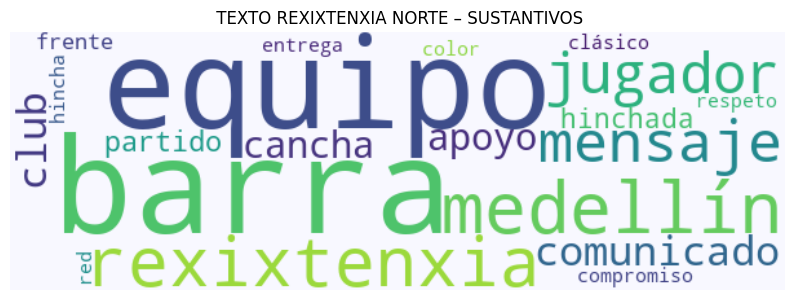

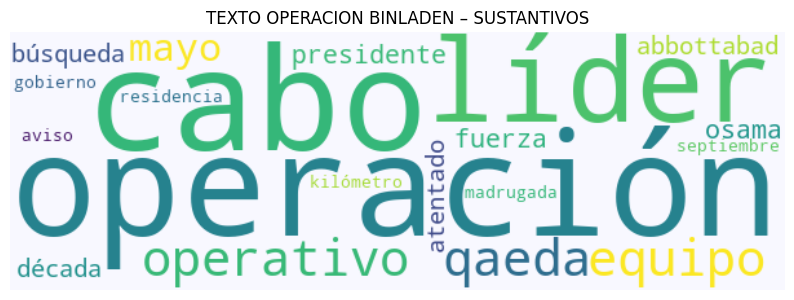

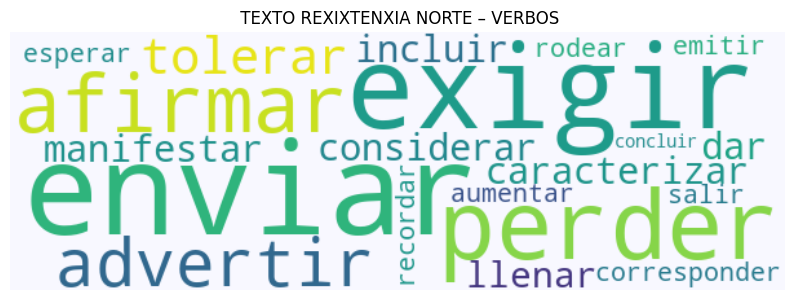

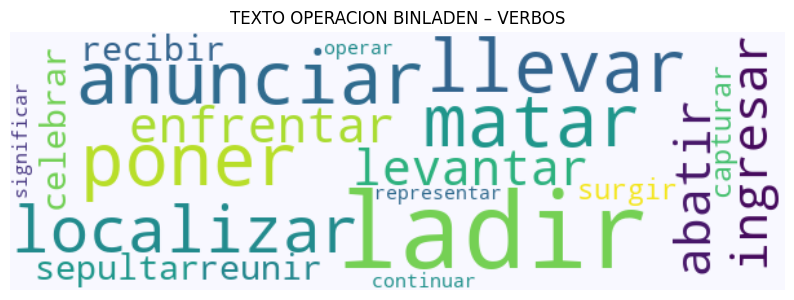

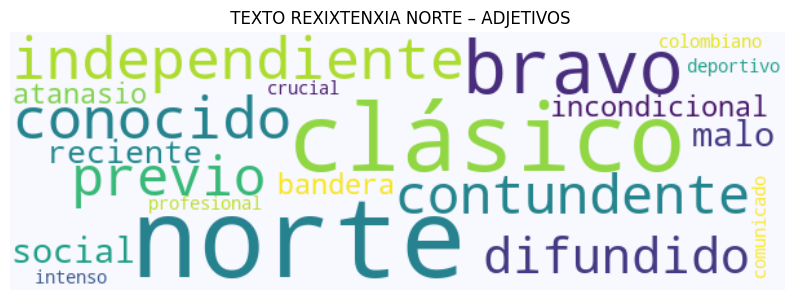

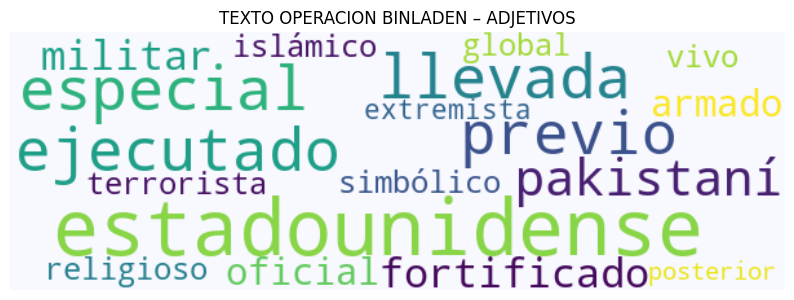

In [51]:
def por_pos(doc, pos):
    return [t.lemma_ for t in doc if t.pos_ == pos and not t.is_stop and not t.is_punct]

for tag, nombre in {"NOUN":"SUSTANTIVOS", "VERB":"VERBOS", "ADJ":"ADJETIVOS"}.items():
    frec1 = collections.Counter(por_pos(doc_rexi, tag)).most_common(20)
    frec2 = collections.Counter(por_pos(doc_binladen, tag)).most_common(20)
    nube(frec1, f" TEXTO REXIXTENXIA NORTE – {nombre}")
    nube(frec2, f"TEXTO OPERACION BINLADEN – {nombre}")

## ANALISIS 

Utilizando la biblioteca spaCy, apliqué un proceso de segmentación gramatical (POS tagging) sobre ambos textos con el fin de identificar y clasificar sus palabras más frecuentes según su categoría morfosintáctica. En particular, el análisis se centró en tres clases gramaticales fundamentales: sustantivos (NOUN), que indican los temas principales o entidades mencionadas; verbos (VERB), que expresan acciones o eventos; y adjetivos (ADJ), que aportan descripciones o juicios valorativos.

Tras filtrar las palabras de cada categoría, generé nubes de palabras por tipo gramatical, lo que permitió visualizar con claridad los elementos del lenguaje que dominan cada texto. Este enfoque no solo revela los temas tratados, sino que también proporciona información valiosa sobre el estilo, la intención y el tono narrativo de cada documento.

## Texto 1: Rexixtenxia Norte
En el texto sobre la barra brava del Independiente Medellín, los sustantivos más frecuentes fueron barra, rexixtenxia, norte, equipo y clásico, lo que evidencia un enfoque centrado en la identidad del grupo hincha, su relación con el club y la importancia simbólica del partido ante Atlético Nacional. Estas palabras apuntan a un discurso cargado de sentido colectivo y pasión deportiva.

Los verbos predominantes incluyeron formas relacionadas con exigir, enviar, perder,afirmar, advertir reflejando una narrativa activa y apelativa, donde la barra no solo observa, sino que interviene directamente con llamados al compromiso y a la entrega por parte del equipo.

Por otro lado, los adjetivos más frecuentes como , clasico, Norte o independiente, estos  refuerzan un tono apasionado y comprometido, destacando valores y sentimientos asociados al orgullo, la pertenencia y el respeto por los colores del club de nuestros amores.

 ## Texto 2: Operación Bin Laden
En contraste, el texto que narra la operación militar para dar de baja a Osama Bin Laden muestra un lenguaje más técnico e informativo. Los sustantivos más utilizados fueron operación, bin, laden, cabo y estadounidense, lo que refleja un contenido centrado en actores militares, planificación estratégica y contexto político internacional.

Entre los verbos más comunes se encontraron llevar, matar, levantar y localizar, todos asociados a una narrativa de acción concreta, que describe hechos ocurridos en el marco de una intervención militar precisa y planificada.

En cuanto a los adjetivos destacados, términos como estadounidense, ejecutado,especial o militar contribuyen a construir un relato con carga descriptiva, pero también con connotaciones geopolíticas y culturales. Estos adjetivos aportan una mirada que busca contextualizar los hechos dentro de un conflicto de escala internacional.

La comparación entre ambos textos revela no solo diferencias temáticas, sino también contrastes en el uso del lenguaje. El texto sobre Rexixtenxia Norte presenta un tono más emocional, directo y valorativo, dominado por sustantivos relacionados con el fútbol y la afición, así como verbos que implican exigencia y participación colectiva. En cambio, el texto de la operación Bin Laden adopta un estilo más narrativo e informativo, donde predominan sustantivos técnicos y verbos que describen acciones militares, proyectando un tono más objetivo y estructurado.

El análisis por categorías gramaticales, complementado con nubes de palabras, permite comprender de forma visual y estructural cómo se construyen los discursos y qué elementos conceptuales predominan en cada narrativa.



## 7. Extraiga tripletas Sujeto-Verbo-Objeto (SVO) usando spaCy. Muestre ejemplos que revelen ideas o afirmaciones comunes. ¿Se puede inferir alguna opinión, tendencia o argumento a partir de estas relaciones?

Una técnica avanzada de análisis sintáctico en el procesamiento de lenguaje natural (PLN) es la extracción de relaciones Sujeto–Verbo–Objeto (SVO). Esta técnica se basa en identificar las estructuras fundamentales de una oración quién hace qué a quién a partir de la dependencia gramatical de las palabras. Para esto, se utiliza el análisis sintáctico que proporciona la biblioteca spaCy, que permite determinar el papel que cada palabra juega dentro de una oración: sujeto nominal, verbo principal y objeto directo, entre otros.

### ¿Por qué es importante extraer tripletas SVO?
Extraer tripletas SVO es esencial porque permite:

Reconstruir el núcleo de las ideas expresadas: nos ayuda a identificar las acciones centrales y sus protagonistas.

Detectar patrones narrativos y argumentativos: por ejemplo, si un texto insiste en que "los hinchas exigen respeto" o que "el equipo necesita entrega", se puede inferir una actitud crítica o exigente.

Resumir contenido de forma estructurada: a partir de múltiples tripletas, se pueden generar resúmenes automáticos o mapas conceptuales.

Capturar opiniones o tendencias implícitas: en textos informativos o argumentativos, el SVO puede revelar posturas editoriales o ideológicas.

El análisis mediante tripletas SVO permite ir más allá del conteo de palabras o la detección de temas. Al centrarse en las relaciones gramaticales entre los elementos de una oración, esta técnica permite reconstruir de forma precisa las ideas centrales, el tono y el enfoque argumentativo de un texto.

In [52]:
def extract_svo(doc):
    tripletas = []
    for sent in doc.sents:
        subj = verb = obj = None
        for tok in sent:
            if tok.dep_ in ('nsubj', 'nsubjpass'):
                subj = tok
            if tok.dep_ == 'ROOT' and tok.pos_ == 'VERB':
                verb = tok
            if tok.dep_ in ('obj', 'dobj'):
                obj = tok
        if subj and verb and obj:
            tripletas.append((subj.text, verb.text, obj.text))
    return tripletas

print("--- SVO REXIXTENCIA NORTE ---")
for t in extract_svo(doc_rexi)[:10]:
    print(t)

print("\n--- SVO OPERACION BINLADEN ---")
for t in extract_svo(doc_binladen)[:10]:
    print(t)

--- SVO REXIXTENCIA NORTE ---
('barra', 'concluyó', 'jugadores')

--- SVO OPERACION BINLADEN ---
('operativo', 'anunció', 'kilómetros')


A partir de las relaciones Sujeto–Verbo–Objeto (SVO) extraídas de ambos textos, es posible identificar patrones discursivos que revelan aspectos fundamentales sobre el tono, propósito y orientación narrativa de cada contenido. Estas tripletas representan la estructura básica de una oración y permiten reconstruir la manera en que se organizan las ideas clave.

 ## Texto 1: Rexixtenxia Norte
Una de las tripletas extraídas fue:

('barra', 'concluyó', 'jugadores')

Esta estructura refleja una acción concreta: un grupo (la barra) que toma una posición firme (concluyó) frente a una entidad específica (jugadores). Aunque puede parecer una construcción directa, en el contexto del texto adquiere un fuerte carácter simbólico y emocional. La barra brava no solo apoya, sino que también juzga y establece exigencias. Este tipo de tripleta muestra un discurso activo, valorativo y colectivo, en el que los hinchas se posicionan como protagonistas del entorno deportivo, no como espectadores pasivos.

Esta relación resalta cómo el texto busca proyectar autoridad moral desde la afición, señalando a los jugadores como responsables directos del orgullo del club. Así, se construye una narrativa en la que el compromiso y la identidad son temas centrales.

 ## Texto 2: Operación Bin Laden
En el caso del segundo texto, una tripleta extraída fue:

('operativo', 'anunció', 'kilómetros')

Aunque esta relación es gramaticalmente válida, sugiere una construcción más técnica o abstracta, posiblemente parte de una oración mayor, como: “el operativo fue anunciado a kilómetros de la zona de acción”. Aquí se evidencia un estilo más impersonal y narrativo, propio de textos informativos o noticiosos. El sujeto (operativo) y el verbo (anunció) remiten a una acción institucional o comunicativa, mientras que el objeto (kilómetros) aporta un dato cuantitativo o geográfico.

Este tipo de construcción refleja un enfoque centrado en describir hechos concretos, localizaciones y secuencias, donde el lenguaje es más objetivo y alejado de lo emocional. El texto transmite información factual, propia de contextos militares o políticos, y busca documentar más que persuadir.

El análisis comparado de las tripletas SVO pone en evidencia dos enfoques narrativos muy distintos:

El texto de Rexixtenxia Norte se apoya en una estructura discursiva donde el sujeto colectivo (la barra) asume un rol activo, con verbos que implican juicio, exigencia y presión emocional sobre otros actores (los jugadores). Esto proyecta un tono participativo, apasionado y simbólicamente cargado.

En contraste, el texto sobre la operación contra Bin Laden estructura sus ideas desde una perspectiva más técnica y descriptiva, donde el sujeto suele ser institucional y el lenguaje transmite acciones precisas, sin valoraciones explícitas. El objetivo principal es relatar hechos con exactitud, no generar adhesión emocional.

Esta comparación ilustra cómo el análisis de las tripletas SVO permite desentrañar la intención comunicativa de un texto, identificando no solo lo que se dice, sino la manera en que se construye la relación entre los actores, las acciones y los objetos implicados en cada narrativa.



# CONCLUSIONES GENERALES TRABAJO RELACIONADO CON MINERIA DE TEXTO
### TEXTO COMUNICACIONAL DE LA BARRA REXIXTENXIA NORTE DEL DEPORTIVO INDEPENDIENTE MEDELLIN (EXIGENCIAS DEPORTIVAS ANTES DEL CLASICO PAISA) Y TEXTO OPERACIÓN OSAMA BIN LADEN 2011

## La minería de texto permitió descubrir patrones discursivos y temáticos relevantes en los documentos analizados.
A través de técnicas fundamentales como la normalización, la tokenización, el análisis de frecuencia léxica y la clasificación por categorías gramaticales, fue posible extraer información valiosa más allá de una simple lectura superficial. Este enfoque permitió identificar los temas predominantes, el tono comunicativo y la estructura narrativa de cada texto, destacando la riqueza del lenguaje empleado y las intenciones que subyacen en cada caso.

## El análisis gramatical y sintáctico reveló las intenciones comunicativas y los roles discursivos presentes en cada contenido.
En el caso del texto de Rexixtenxia Norte, se evidenció un discurso emocional, colectivo y exigente, centrado en la identidad del grupo hincha y su influencia sobre el equipo. Predominaron sustantivos relacionados con el fútbol, verbos de exigencia y adjetivos con carga valorativa. Por el contrario, en el texto sobre la operación militar contra Bin Laden, el lenguaje fue más técnico, institucional y factual, con una narrativa basada en hechos, actores políticos y acciones militares. Las diferencias en el uso del lenguaje reflejan no solo los temas tratados, sino también la naturaleza discursiva y el propósito comunicativo de cada documento: uno busca movilizar emociones; el otro, informar con precisión.

## Las visualizaciones mediante nubes de palabras y relaciones SVO enriquecieron la comprensión del contenido
 el uso de herramientas gráficas como las nubes de palabras por categoría gramatical y la extracción de tripletas Sujeto–Verbo–Objeto (SVO) facilitó una interpretación más intuitiva y estructurada del contenido. Estas representaciones permitieron identificar rápidamente los conceptos clave, las acciones dominantes y los agentes involucrados en cada narrativa. En el texto de Rexixtenxia, las relaciones SVO mostraron un sujeto colectivo activo (la barra) que interpela y condiciona; mientras que en el texto de Bin Laden, las tripletas reflejaron acciones institucionales y un relato más neutral y descriptivo.

## La combinación de métodos lingüísticos y visuales aportó un enfoque integral al análisis textual.
 Este proyecto demostró que el análisis textual con herramientas de PLN (como spaCy) no solo es útil para el procesamiento automatizado de texto, sino también para revelar aspectos profundos de la comunicación, como el posicionamiento ideológico, el tono emocional y la estructura argumentativa. Gracias a estas técnicas, fue posible abordar cada documento desde una perspectiva tanto lingüística como semántica, logrando una lectura más crítica y completa.

En síntesis, el análisis automatizado de textos permite transformar datos narrativos en información estructurada y significativa, lo cual resulta de gran utilidad para estudios de comunicación, análisis político, investigación periodística y procesamiento de grandes volúmenes de información textual.